# Домашее задание №5

В файле bank-additional-full.csv содержаться данные о маркетинговой кампании банка.

Описание переменных

Bank client data:

    •	age (numeric)
    •	job : type of job (categorical)
    •	marital : marital status (categorical)
    •	education (categorical)
    •	default: has credit in default? (categorical)
    •	housing: has housing loan? (categorical)
    •	loan: has personal loan? (categorical)

Related with the last contact of the current campaign:

    •	contact: contact communication type (categorical)
    •	month: last contact month of year (categorical)
    •	day_of_week: last contact day of the week (categorical)
    •	duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

    •	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    •	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    •	previous: number of contacts performed before this campaign and for this client (numeric)
    •	poutcome: outcome of the previous marketing campaign (categorical)

Social and economic context attributes:

    •	emp.var.rate: employment variation rate - quarterly indicator (numeric)
    •	cons.price.idx: consumer price index - monthly indicator (numeric)
    •	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    •	euribor3m: euribor 3 month rate - daily indicator (numeric)
    •	nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

    •	y - has the client subscribed a term deposit? (binary: 'yes','no')


Задания:

    •	Сформулируйте гипотезы исследования.
    •	Постройте модель бинарной логистической регрессии. Зависимая переменная – y отражает оформил ли клиент банка срочный депозит. В качестве предикторов выберите не менее 3 метрических переменных и не менее 3 категориальных переменных.
    •	Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели.  Оцените статическую значимость и предсказательную силу модели.
    •	Оцените значимость регрессионных коэффициентов. Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной.
    •	Проведите диагностику модели (проверьте остатки на нормальность, оцените мультиколлинартность). 
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc

In [193]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [194]:
# Названия переменных, сгруппированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



In [195]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений


В датасете нет пропущенных значений

In [196]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

В датасете присутствует дизбаланс классов

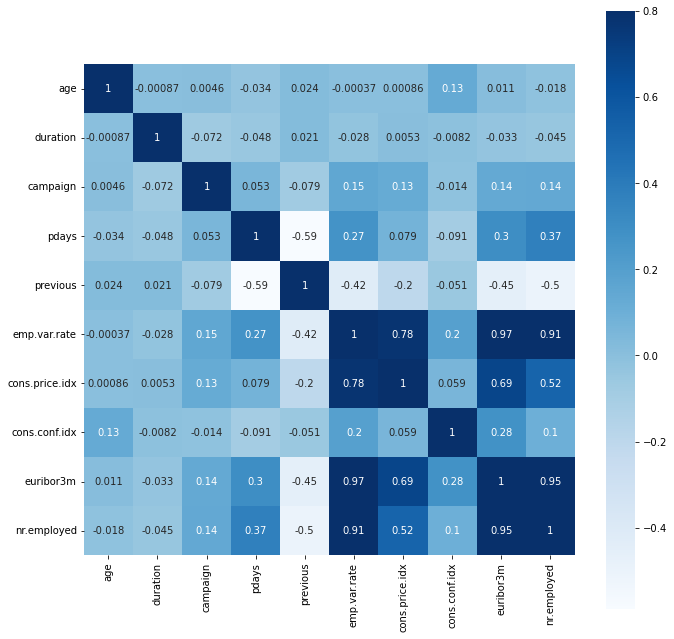

In [197]:
plt.figure(figsize=(11, 11))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap='Blues',annot=True)
plt.show()

Некоторые переменные имеют высокую корреляцию!

## 1 Гипотезы

1) Возраст человека не имеет статистически значимого влияния на оформлением депозита\
2) Количество контактов, осуществленных до начала данной кампании не имеет статистически значимого влияния на оформлением депозита (переменная previous)\
3) Количество дней, прошедших с момента последнего обращения к клиенту в рамках предыдущей кампании не имеет статистически значимого влияния на оформление депозита(переменная pdays)\
4) Работа не имеет статистически значимого влияния на офрмление депозита\
5) Наличие непогашенного кредита не имеет статистически значимого влияния на оформление депозита\
6) Наличие ипотеки не имеет статистически значимого влияния на оформление депозита (housing loan)

In [198]:
job_dummies = pd.get_dummies(df.job, prefix='Job', prefix_sep='_') 
job_dummies.head() 

,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [199]:
df['job'].value_counts() # референтная группа - admin.

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [200]:
default_dummies = pd.get_dummies(df.default, prefix='Default', prefix_sep='_') 
default_dummies.head() 

,Default_no,Default_unknown,Default_yes
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [201]:
df['default'].value_counts() # референтная группа - no

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [202]:
housing_dummies = pd.get_dummies(df.housing, prefix='Housing', prefix_sep='_') 
housing_dummies.head() 

,Housing_no,Housing_unknown,Housing_yes
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [203]:
df['housing'].value_counts() # референтная группа - yes

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [204]:
df = pd.concat([df, job_dummies, default_dummies, housing_dummies], axis=1) 
df.head()
#добавляем дамми-переменные в датафрейм

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Job_student,Job_technician,Job_unemployed,Job_unknown,Default_no,Default_unknown,Default_yes,Housing_no,Housing_unknown,Housing_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,1,0,0,1,0,0


## 2 Модель

In [233]:
names = list(job_dummies.columns)
names.remove('Job_admin.')
x_mult = df[['Default_unknown','Default_yes','Housing_unknown','Housing_no','age','previous','pdays']+names]
#x_mult = x_mult.astype(float)
y = df['y']
x_mult_constant = sm.add_constant(x_mult)

In [206]:
def transform(x):
    if x=="no":
        return 0
    else:
        return 1

In [207]:
df['y'] = df['y'].apply(transform)

In [208]:
y = y.apply(transform)

In [209]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [210]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [211]:
model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())

         Current function value: 0.311991
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41169
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1137
Time:                        20:11:34   Log-Likelihood:                -12850.
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0282      0.109      0.260      0.795      -0.185       0.241
Default_unknown      -0.7680      0.054    -

D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 3

Уравнение регрессии:

In [212]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 0.028232 + -0.77*Default_unknown + -17.92*Default_yes + -0.06*Housing_unknown + -0.04*Housing_no + 0.00*age + 0.23*previous + -0.00*pdays + -0.44*Job_blue-collar + -0.32*Job_entrepreneur + -0.22*Job_housemaid + -0.15*Job_management + 0.65*Job_retired + -0.10*Job_self-employed + -0.35*Job_services + 0.91*Job_student + -0.16*Job_technician + 0.09*Job_unemployed + -0.09*Job_unknown


Pseudo R-squ.:  0.1137 - модель объясняет 11% изменчивости значений зависимой переменной.

LLR p-value:    0.000 - модель статистически значима

accuracy (процент верно предсказанных событий) = 0.8980042730892493 - модель предстазывает 90 процентов объектов правильно

ROC-AUC = 0.69

##### Accuracy

In [213]:
cm = model1.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 36063.0 | FN: 485.0
-------------------
FP: 3716.0  | TN: 924.0


In [214]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Точность (процент верно предсказанных событий): = {}'.format(accuracy))

Точность (процент верно предсказанных событий): = 0.8980042730892493


##### ROC-AUC

In [215]:
fpr, tpr, _ = roc_curve(df.y, model1.predict())
roc_auc = auc(fpr, tpr)

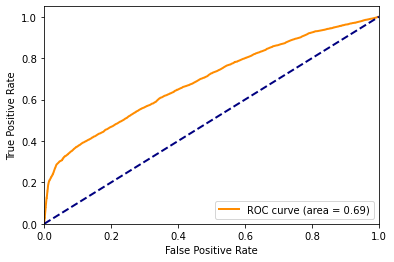

In [216]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## 4

### Оценка значимости регрессионых коэффицентов

In [219]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'

In [220]:
pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
Default_unknown,0.000,significant
Default_yes,0.999,non-significant
Housing_unknown,0.605,non-significant
Housing_no,0.196,non-significant
age,0.008,significant
previous,0.000,significant
pdays,0.000,significant
Job_blue-collar,0.000,significant
Job_entrepreneur,0.002,significant


### Интерпретация значений коэффициентов регрессии

In [222]:
coefs = pd.DataFrame()
coefs['Coefs'] = model1.params[1:]
coefs['Features'] = model1.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model1.params[0])
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs
#коэффициенты регрессии и отношения шансов
#отдельно выводим коэффициенты регрессии

Intercept =  0.02823196923334599


,Coefs,OddsRatio
Features,,
Default_unknown,-0.768029,4.639266e-01
Default_yes,-17.922115,1.646358e-08
Housing_unknown,-0.057990,9.436591e-01
Housing_no,-0.043840,9.571069e-01
age,0.004864,1.004875e+00
previous,0.230281,1.258954e+00
pdays,-0.002282,9.977206e-01
Job_blue-collar,-0.436885,6.460456e-01
Job_entrepreneur,-0.322353,7.244428e-01


- У клиентов, которых не известно, имеют ли они просроченный кредит, шансы оформить депозит в 0.46 раз больше, чем у клиентов, у которые не имеютпросроченного кредита
- Рассмотрим коэфиццент при ремененной Age. Из него следует, что при увеличении возраста клиента на один год в среднем увеличивает шанс оформить депозит на 0.5 процента
- Рассмотрим коэфиццент при ремененной Previous. Из него следует, что при увеличении количество контактов, осуществленных до начала данной кампании на один в среднем увеличивает шанс оформить депозит на 26 процентов
- Рассмотрим коэфиццент при ремененной Pdays. Из него следует, что при увеличении количество дней, прошедших с момента последнего обращения к клиенту в рамках предыдущей кампании на один в среднем уменьшает шанс оформить депозит на 0.2 процента
- Рассмотрим коэфиццент при ремененной Job_entrepreneur. Из него следует, что работая предпринимателем,шанс оформить депозит такому клиенту в 72 раза больше, чем работая администратором
- Рассмотрим коэфиццент при ремененной Job_retired. Из него следует, что если клиент находится в отставке,то шанс оформить депозит такому клиенту в 1.9 раза больше, чем работая администратором\
и т.д

## Диагностика модели

### Остатки

In [228]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

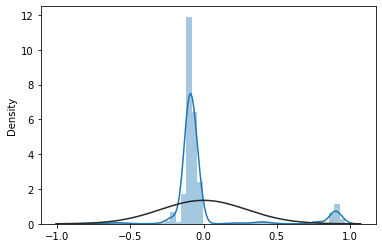

In [229]:
sns.distplot(model1.resid_generalized, fit=stats.norm) 

Распределение остатков отличается от нормального

### Мультиколлинеарность

In [230]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [231]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
1,1.000528,Default_yes
2,1.021128,Housing_unknown
3,1.021882,Housing_no
17,1.033078,Job_unknown
16,1.073246,Job_unemployed
0,1.090587,Default_unknown
9,1.092676,Job_housemaid
12,1.099748,Job_self-employed
8,1.106135,Job_entrepreneur
14,1.113935,Job_student


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

### Вывод

1. Гипотеза о влиянии возраста на доход: возраст имеет статистически значимое влияние на оформление депозита.

2. Гипотеза о влиянии количество контактов, осуществленных до начала данной кампании: кол-во контактов имеет статистически значимое влияние оформление депозита.

3. Гипотеза о влиянии количества контактов, осуществленных в ходе данной кампании имеет статистически значимое влияния на оформлением депозита.
 
4. Гипотеза о влиянии работы: работа влияет на оформление депозита.

5. Гипотеза о влиянии наличия непогашенного кредита: имеет ли клиент непогашенный кредит, имеет статистически значимое на оформление депозита.

6. Гипотеза о влиянии ипотеки: наличие ипотеки не влияет на оформление депозита

В целом, мои ожидания от регрессионного анализа оправдались, так как факторы, которые я выбрал в качестве признаков для построения модели в большинстве оказались статистически значимыми. Удивило, что гипотеза о связи открытия депозита в зависимости от наличии ипотеки не подтвердилась. Остальные факторы оказывают статистически значимое влияние на предстазываемую услуги, что было логически понятным при выборе признаков.